In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- Initially, we have loaded all the libraries that we need: 
      - to load the dataset.
      - to preprocess the data.
      - to do data analysis & visualization
- Later we will import libraries that we need for model building
      

In [2]:
#load dataset into dataframe
df = pd.read_csv('heart.csv')

In [3]:
#remove duplicste rows
df.drop_duplicates(inplace = True)

# Data Preprocessing

In [4]:
print('Shape: ',df.shape)
print('Columns: ',df.columns)

Shape:  (918, 12)
Columns:  Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


 <h2>Expalin:</h2>
 
- We print shape to know the shape of the dataset and how many data in the dataset.
 
- There are 918 samples and 12 columns(11 feature and  one target varriable) at this dataset.
 

In [5]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


- Print dataframe to see how the dataset looks like

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


<h2>This information tells us that:</h2>

- There are 918 rows and 12 columns
- Six columns have int64 datatype, five columns have object datatype and one column has float64 data type
- There is no null value in this dataset. Thats why we do not need to remove empty cell.

# Exploratory Data Analysis

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- Calculating some statistical data like percentile, mean and std of the numerical values of the DataFrame.
- It analyzes both numeric and object data types.

In [8]:
print('Gender :'+'\n-------')
print(df["Sex"].value_counts(),'\n')
print('Chest Pain Type :'+'\n---------------')
print(df["ChestPainType"].value_counts(),'\n')
print('Fasting BS :'+'\n----------')
print(df["FastingBS"].value_counts(),'\n')
print('Resting ECG :'+'\n------------')
print(df["RestingECG"].value_counts(),'\n')
print('Exercise Angina :'+'\n----------------')
print(df["ExerciseAngina"].value_counts(),'\n')
print('ST Slope :'+'\n---------')
print(df["ST_Slope"].value_counts(),'\n')
print('Heart Disease :'+'\n--------------')
print(df["HeartDisease"].value_counts())

Gender :
-------
M    725
F    193
Name: Sex, dtype: int64 

Chest Pain Type :
---------------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

Fasting BS :
----------
0    704
1    214
Name: FastingBS, dtype: int64 

Resting ECG :
------------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

Exercise Angina :
----------------
N    547
Y    371
Name: ExerciseAngina, dtype: int64 

ST Slope :
---------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 

Heart Disease :
--------------
1    508
0    410
Name: HeartDisease, dtype: int64


<h3> Features that are categorical we need to know how many entities in each category</h3> 
    
- We can see in the dataset number of male is 725 and Female is 193.
- Four Chest Pain Type :ASY, NAP, ATA, TA and each of them has 496,203,173,46 patient respectively.
- Two types of FastingBS 
- Three types of RestingECG (Normal, LVH, ST)
- Exercise Angina (Yes and No)
- Three types of ST Slope (Flat, up, down)
- Heart Disease (Yes and No) 

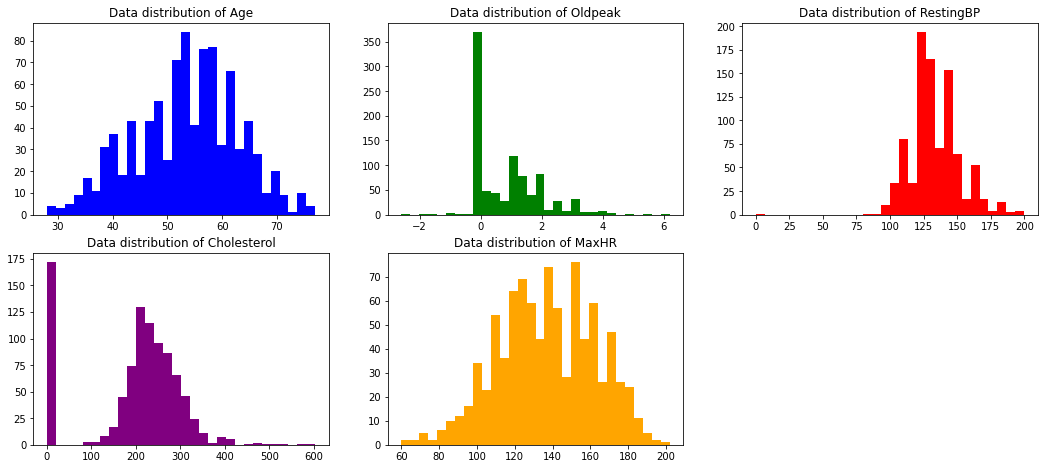

In [9]:
plt.figure(figsize=(18,12))
plt.subplot(3,3,1);
plt.hist(df['Age'], bins=30, color='blue')
plt.title("Data distribution of Age");

plt.subplot(3,3,2);
plt.hist(df['Oldpeak'], bins=30, color='green')
plt.title("Data distribution of Oldpeak");

plt.subplot(3,3,3);
plt.hist(df['RestingBP'], bins=30, color='red')
plt.title("Data distribution of RestingBP");
plt.subplot(3,3,4);
plt.hist(df['Cholesterol'], bins=30, color='purple')
plt.title("Data distribution of Cholesterol");

plt.subplot(3,3,5);
plt.hist(df['MaxHR'], bins=30, color='orange')
plt.title("Data distribution of MaxHR");

plt.show()

<h3>Distribution of different attributes- </h3>

- We can see, the values of Age are distributed normally.
- Most of the patient's age are around 45–65 range.
- Oldpeak does not follow normal distribution.
- The values of RestingBP are distributed normally with few outliers.
- Most of the patient's RestingBP are around 125-150 range.
- MaxHR and Cholestrol also distributed normally with few outliers.


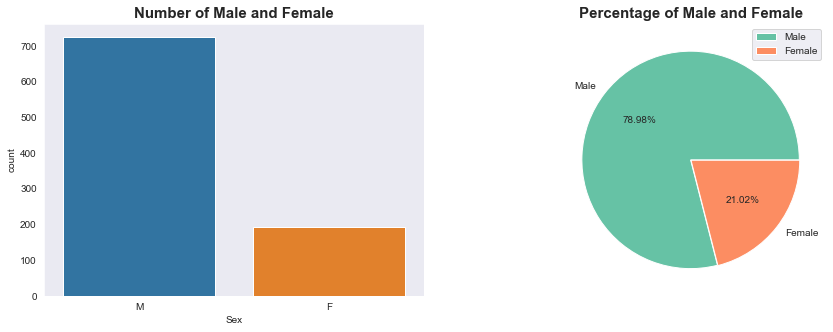

In [10]:
size=[df['Sex'].value_counts()["M"],df['Sex'].value_counts()['F']]
labels=['Male','Female']

sns.set_style("dark")
colors = sns.color_palette('Set2')
plt.figure(figsize=(15,5))

plt.subplot(1,2,1);
sns.countplot(x='Sex', data=df)
plt.title("Number of Male and Female",fontweight="bold",fontsize = 15);

plt.subplot(1,2,2);
plt.pie(size, labels=labels,colors=colors, autopct="%.2f%%", explode=(0, 0.005))
plt.legend(fontsize=10)
plt.title("Percentage of Male and Female",fontweight="bold",fontsize = 15)

plt.show()


# Male and Female
- To visualize the number of male and female we have used bar chart and pie chart
- It's clearly shows the number of male is more than 700 and female is less than 200 in the dataset
- Allmost 79% patient is male and only 21% patient is female

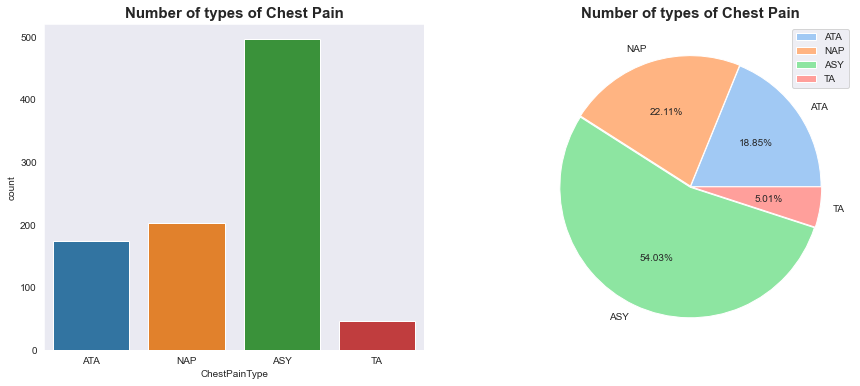

In [11]:
size=[df['ChestPainType'].value_counts()['ATA'],df['ChestPainType'].value_counts()['NAP'],
      df['ChestPainType'].value_counts()['ASY'],df['ChestPainType'].value_counts()['TA']]

labels=['ATA','NAP','ASY','TA']

sns.set_style("dark")
colors = sns.color_palette('pastel')
plt.figure(figsize=(15,6))

plt.subplot(1,2,1);
sns.countplot(x='ChestPainType', data=df)
plt.title("Number of types of Chest Pain",fontweight="bold",fontsize = 15);

plt.subplot(1,2,2);
plt.pie(size, labels=labels,colors=colors, autopct="%.2f%%", explode=(0, 0.005,0.005,0.005))
plt.legend(fontsize=10)
plt.title("Number of types of Chest Pain",fontweight="bold",fontsize = 15)
plt.show()


# Chest Pain Type:
- To visualize the type and number of chestpain patient we have used bar chart and pie chart
- It's clearly shows the number of ASY is more than 400, NAP is more than 200, ATA is less than 200 and TA is less than 50 in the dataset
- About 54% of patient ASY type chest pain and NAP, ATA, TA is 22%, 19%, 5% respectively

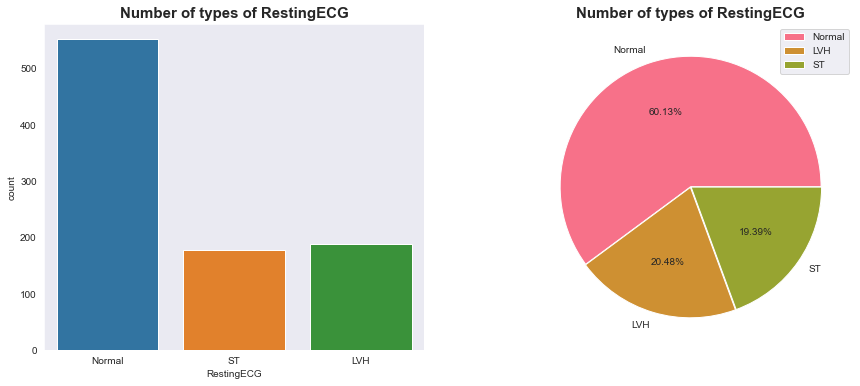

In [12]:
size=[df['RestingECG'].value_counts()['Normal'],df['RestingECG'].value_counts()['LVH'],
      df['RestingECG'].value_counts()['ST']]

labels=['Normal','LVH','ST']

sns.set_style("dark")
colors = sns.color_palette("husl", 8)
plt.figure(figsize=(15,6))

plt.subplot(1,2,1);
sns.countplot(x='RestingECG', data=df)
plt.title("Number of types of RestingECG",fontweight="bold",fontsize = 15);

plt.subplot(1,2,2);
plt.pie(size, labels=labels,colors=colors, autopct="%.2f%%", explode=(0, 0.005,0.005))
plt.legend(fontsize=10)
plt.title("Number of types of RestingECG",fontweight="bold",fontsize = 15)
plt.show()

# RestingECG:
- To visualize the type of RestingECG and number of patient we have used bar chart and pie chart.
- It's clearly shows the number of Normal RestingECG patient is more than 500, LVH is  188, ST is 178 in the dataset.
- About 60% of patient normal resting ECG and LVH, ST is 20.48% and 19.39% respectively.

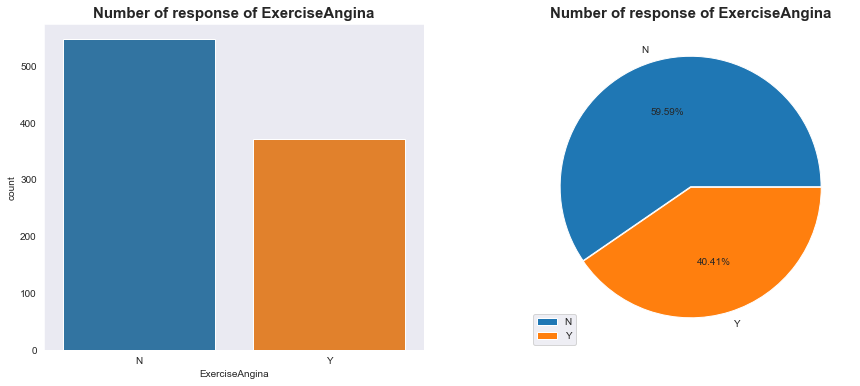

In [13]:
size=[df['ExerciseAngina'].value_counts()['N'],df['ExerciseAngina'].value_counts()['Y']]
labels=['N','Y']

sns.set_style("dark")
colors = sns.color_palette("Set2")
plt.figure(figsize=(15,6))

plt.subplot(1,2,1);
sns.countplot(x='ExerciseAngina', data=df)
plt.title("Number of response of ExerciseAngina",fontweight="bold",fontsize = 15);

plt.subplot(1,2,2);
plt.pie(size, labels=labels,autopct="%.2f%%", explode=(0, 0.005))
plt.legend(fontsize=10)
plt.title("Number of response of ExerciseAngina",fontweight="bold",fontsize = 15)
plt.show()

# ExerciseAngina:
- To visualize the type of ExerciseAngina and number of patient we have used bar chart and pie chart.
- It's clearly shows the number of NO Exercise Angina patient is more than 500 and yes is less than 400 in the dataset.
- About 60% of patient do not exercise and 40.41% patient do exercise.

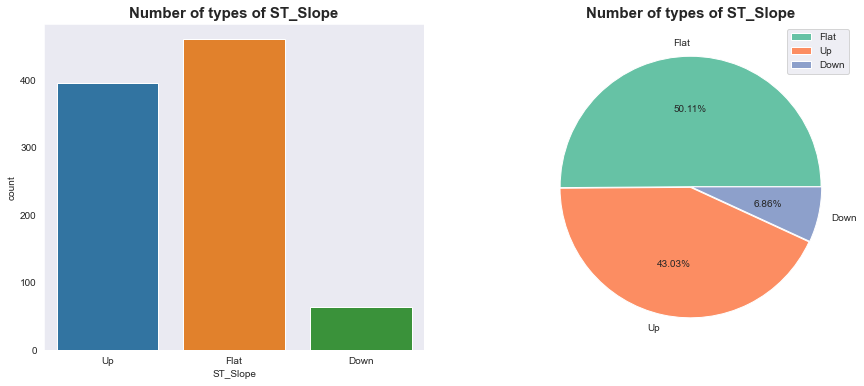

In [14]:
size=[df['ST_Slope'].value_counts()['Flat'],df['ST_Slope'].value_counts()['Up'],
      df['ST_Slope'].value_counts()['Down']]

labels=['Flat','Up','Down']

sns.set_style("dark")
colors = sns.color_palette("Set2")
plt.figure(figsize=(15,6))

plt.subplot(1,2,1);
sns.countplot(x='ST_Slope', data=df)
plt.title("Number of types of ST_Slope",fontweight="bold",fontsize = 15)

plt.subplot(1,2,2);
# create pie chart using matplotlib
plt.pie(size, labels=labels,colors=colors, autopct="%.2f%%", explode=(0, 0.005,0.005))
plt.legend(fontsize=10)
plt.title("Number of types of ST_Slope",fontweight="bold",fontsize = 15)

plt.show()

# ST_Slope:
- To visualize the type of ST_Slope and number of patient we have used bar chart and pie chart.
- It's clearly shows the number of Flat ST_Slope patient is more than 400, Up is almost 400 and Down is less than 100 in the dataset.
- About 50% of patient has Flat ST_Slope and Up, Down is 43% and 6.86% respectively.

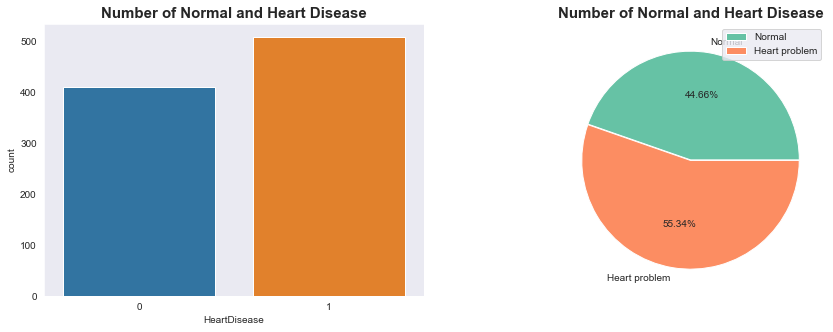

In [15]:
size=[df['HeartDisease'].value_counts()[0],df['HeartDisease'].value_counts()[1]]

labels=['Normal', 'Heart problem']

sns.set_style("dark")
colors = sns.color_palette("Set2")
plt.figure(figsize=(15,5))

plt.subplot(1,2,1);
sns.countplot(x='HeartDisease', data=df)
plt.title("Number of Normal and Heart Disease",fontweight="bold",fontsize = 15);

plt.subplot(1,2,2);
plt.pie(size, labels=labels,colors=colors, autopct="%.2f%%", explode=(0, 0.005))
plt.legend(fontsize=10)
plt.title("Number of Normal and Heart Disease",fontweight="bold",fontsize = 15)
plt.show()


# HeartDisease:
- To visualize the normal and heart disease patient we have used bar chart and pie chart.
- It's clearly shows the number of heart disease patient is more than 500 and normal patient is  410 in the dataset.
- About 56.34% of patient has heart disease and 44.66% are normal patient.

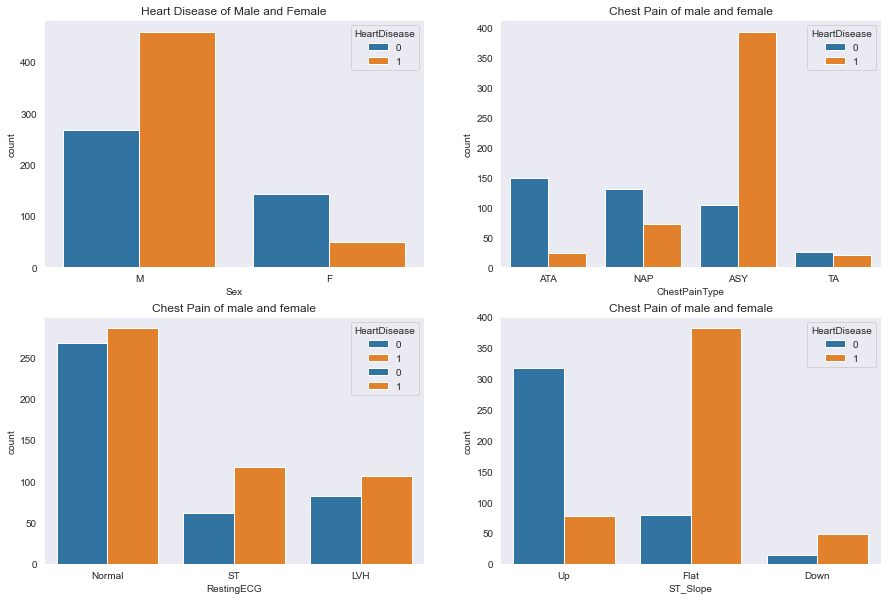

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1);
sns.countplot(x='Sex', hue='HeartDisease', data=df);
plt.title('Heart Disease of Male and Female')

plt.subplot(2,2,2);
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title('Chest Pain of male and female')

plt.subplot(2,2,3);
sns.countplot(x='RestingECG', hue='HeartDisease', data=df)
plt.title('Chest Pain of male and female')

plt.subplot(2,2,3);
sns.countplot(x='RestingECG', hue='HeartDisease', data=df)
plt.title('Chest Pain of male and female')

plt.subplot(2,2,4);
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)
plt.title('Chest Pain of male and female')

plt.show()

# HeartDisease based on Male, Female,ChestPain, RestingECG, ST_Slope:
- To visualize the HeartDisease based on Male, Female, RestingECG, ST_Slope, ChestPainType we have used bar chart.
- It clearly shows more than 400 male has heart disease and less than 300 male are normal patient.
- More than 100 female are normal and less than 50 female has heart disease.
- Patient whose chest pain type is ASY maximum of them has heart disease and whose chest pain type is ATA maximum of them are normal.
- For normal restingECG the ratio of heart disease and normal is almost same.
- Patient whose ST_Slope is Flat has the highest rate of heart disease on the other hand whose ST_Slope is Up most of them have no heart disease.

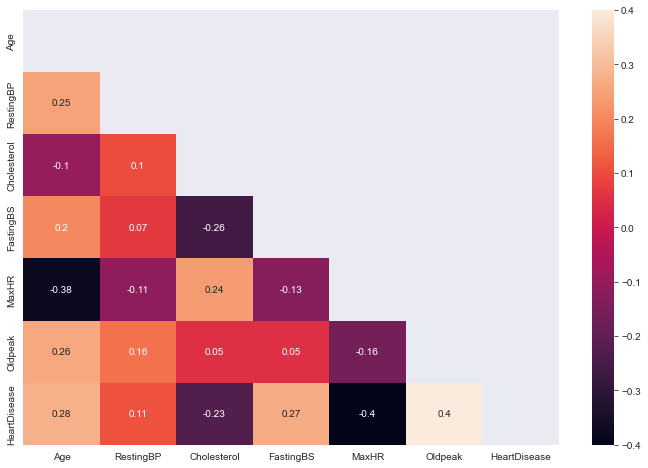

In [17]:
# corr() to calculate the correlation between variables
correlation_matrix = df.corr().round(2)
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (12, 8))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);


# Correlation Matrix
- To train our model we need to select feature that will be used in training.
- To select the best feature we need to find the correlation between feature and target variable.
- This correlation matrix did not consider the attribute which data type is object.
- We can see the correlation with target variable(heart disease) is not so strong.
- Highest positive correlation is 0.4 with Oldpeak and highest negative correlation is -0.4 with maxHR
- We will not be able to get a good accuracy based on these two features.

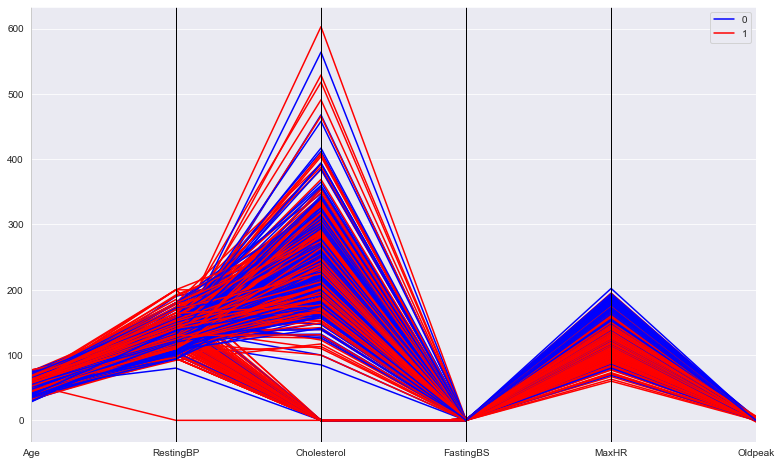

In [18]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(13,8))
parallel_coordinates(df, "HeartDisease",cols=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak'], color = ['blue', 'red']);

# Parallel coordinate
- As we did not select the best feature from the correlation matrix, here we used another technique named parallel correlation.
- This parallel plot allows comparing the feature on a set of numeric variables.
- This plotting did not consider the object type feature.
- From this graph, we can not select the best feature as they overlap with each other. So we need to do more data analysis.

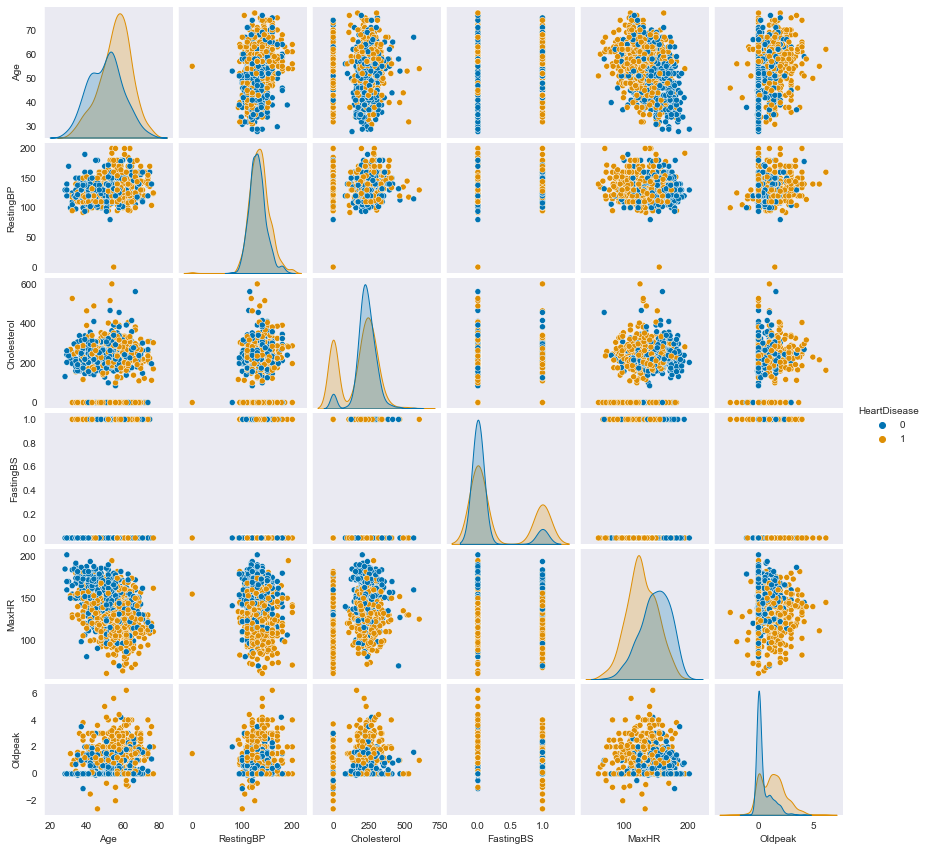

In [19]:
sns.pairplot(df, hue="HeartDisease", height = 2, palette = 'colorblind');

# Pair plot
- Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. 
- It also helps to form classification models by drawing lines or making a linear separation in our data-set.
- But in the plotting we can see it is very tough properly separate classes because they strongly overlapped with each other.
- Although we can select RestingBP, MaxHR or Oldpeak, MaxHR feature but they will not be able to make an accurate predictions.
- We will test our model by these features but before that, we will use other data analyses.

In [20]:
#Sex
for x in df.index:
 if df.loc[x, "Sex"] == 'M':
    df.loc[x, "Sex"] = 0
 if df.loc[x, "Sex"] == 'F':
    df.loc[x, "Sex"] = 1

df["Sex"] = df["Sex"].astype(object).astype(int)


#ChestPainType
for x in df.index:
 if df.loc[x, "ChestPainType"] == 'TA':
    df.loc[x, "ChestPainType"] = 3
 if df.loc[x, "ChestPainType"] == 'NAP':
    df.loc[x, "ChestPainType"] = 1
 if df.loc[x, "ChestPainType"] == 'ATA':
    df.loc[x, "ChestPainType"] = 2
 if df.loc[x, "ChestPainType"] == 'ASY':
    df.loc[x, "ChestPainType"] = 0

df["ChestPainType"] = df["ChestPainType"].astype(object).astype(int)

#RestingECG
for x in df.index:
 if df.loc[x, "RestingECG"] == 'Normal':
    df.loc[x, "RestingECG"] = 0
 if df.loc[x, "RestingECG"] == 'LVH':
    df.loc[x, "RestingECG"] = 1
 if df.loc[x, "RestingECG"] == 'ST':
    df.loc[x, "RestingECG"] = 2


df["RestingECG"] = df["RestingECG"].astype(object).astype(int)

#ExerciseAngina
for x in df.index:
 if df.loc[x, "ExerciseAngina"] == 'Y':
    df.loc[x, "ExerciseAngina"] = 1
 if df.loc[x, "ExerciseAngina"] == 'N':
    df.loc[x, "ExerciseAngina"] = 0


df["ExerciseAngina"] = df["ExerciseAngina"].astype(object).astype(int)

#ST_Slope
for x in df.index:
 if df.loc[x, "ST_Slope"] == 'Flat':
    df.loc[x, "ST_Slope"] = 0
 if df.loc[x, "ST_Slope"] == 'Up':
    df.loc[x, "ST_Slope"] = 1
 if df.loc[x, "ST_Slope"] == 'Down':
    df.loc[x, "ST_Slope"] = 2


df["ST_Slope"] = df["ST_Slope"].astype(object).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 107.6 KB


# Object to Integer:
- In our dataset ChestPainType, RestingECG, ExerciseAngina, ST_Slope these features were object types.
- For this reason, we were not able to find a correlation matrix, pair plot and parallel coordinate of these features.
- To solve this problem we convert these feature's object type values with appropriate integer values.
- For example in ChestPainType there are four types- ASY, ATA, NAP,TA. We replace these values by 0, 1, 2 and 3 respectively.
- RestingECG, ExerciseAngina, ST_Slope values also replaced in the same way.

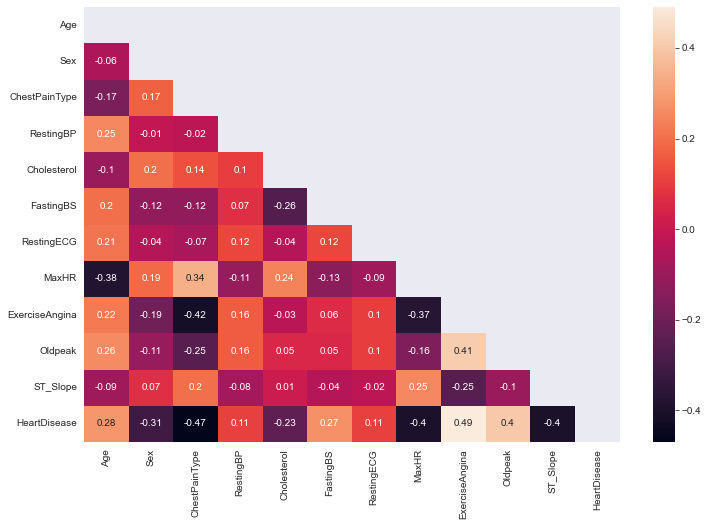

In [21]:
# corr() to calculate the correlation between variables
correlation_matrix = df.corr().round(2)
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (12, 8))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

# Correlation Matrix
- After converting the feature of object type by integer we got a new correlation matrix.
- This correlation matrix considers all the attributes including the converted attributes.
- We can see the correlation matrix has changed compared to the previous one.
- The highest positive correlation is 0.49 with ExerciseAngina and the highest negative correlation is -0.62 with ST_Slope.

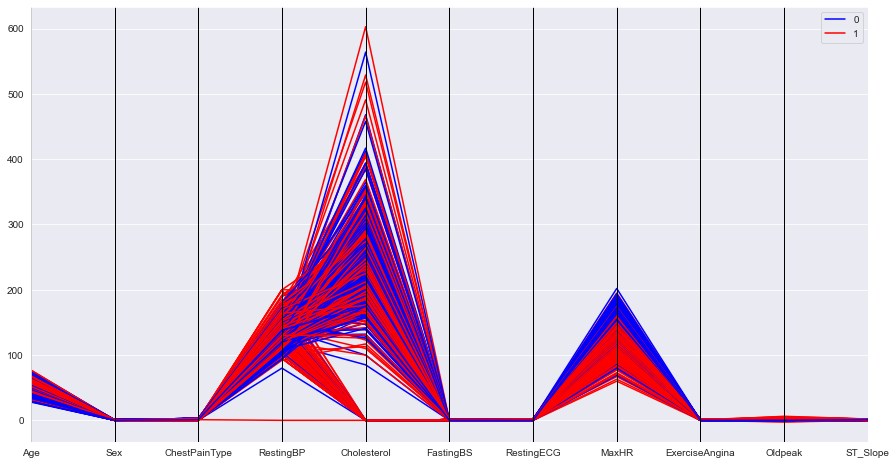

In [22]:
plt.figure(figsize=(15,8))
parallel_coordinates(df, "HeartDisease", color = ['blue', 'red']);


# Parallel coordinate
- After converting the feature of object type by integer we got a new parallel coordinate.
- This parallel coordinate considers all the attributes including the converted attributes.
- We can see the parallel coordinate has changed compared to the previous one.
- Now we can classify heartdisease based on maxhr and RestingBP though there is still overlap available.

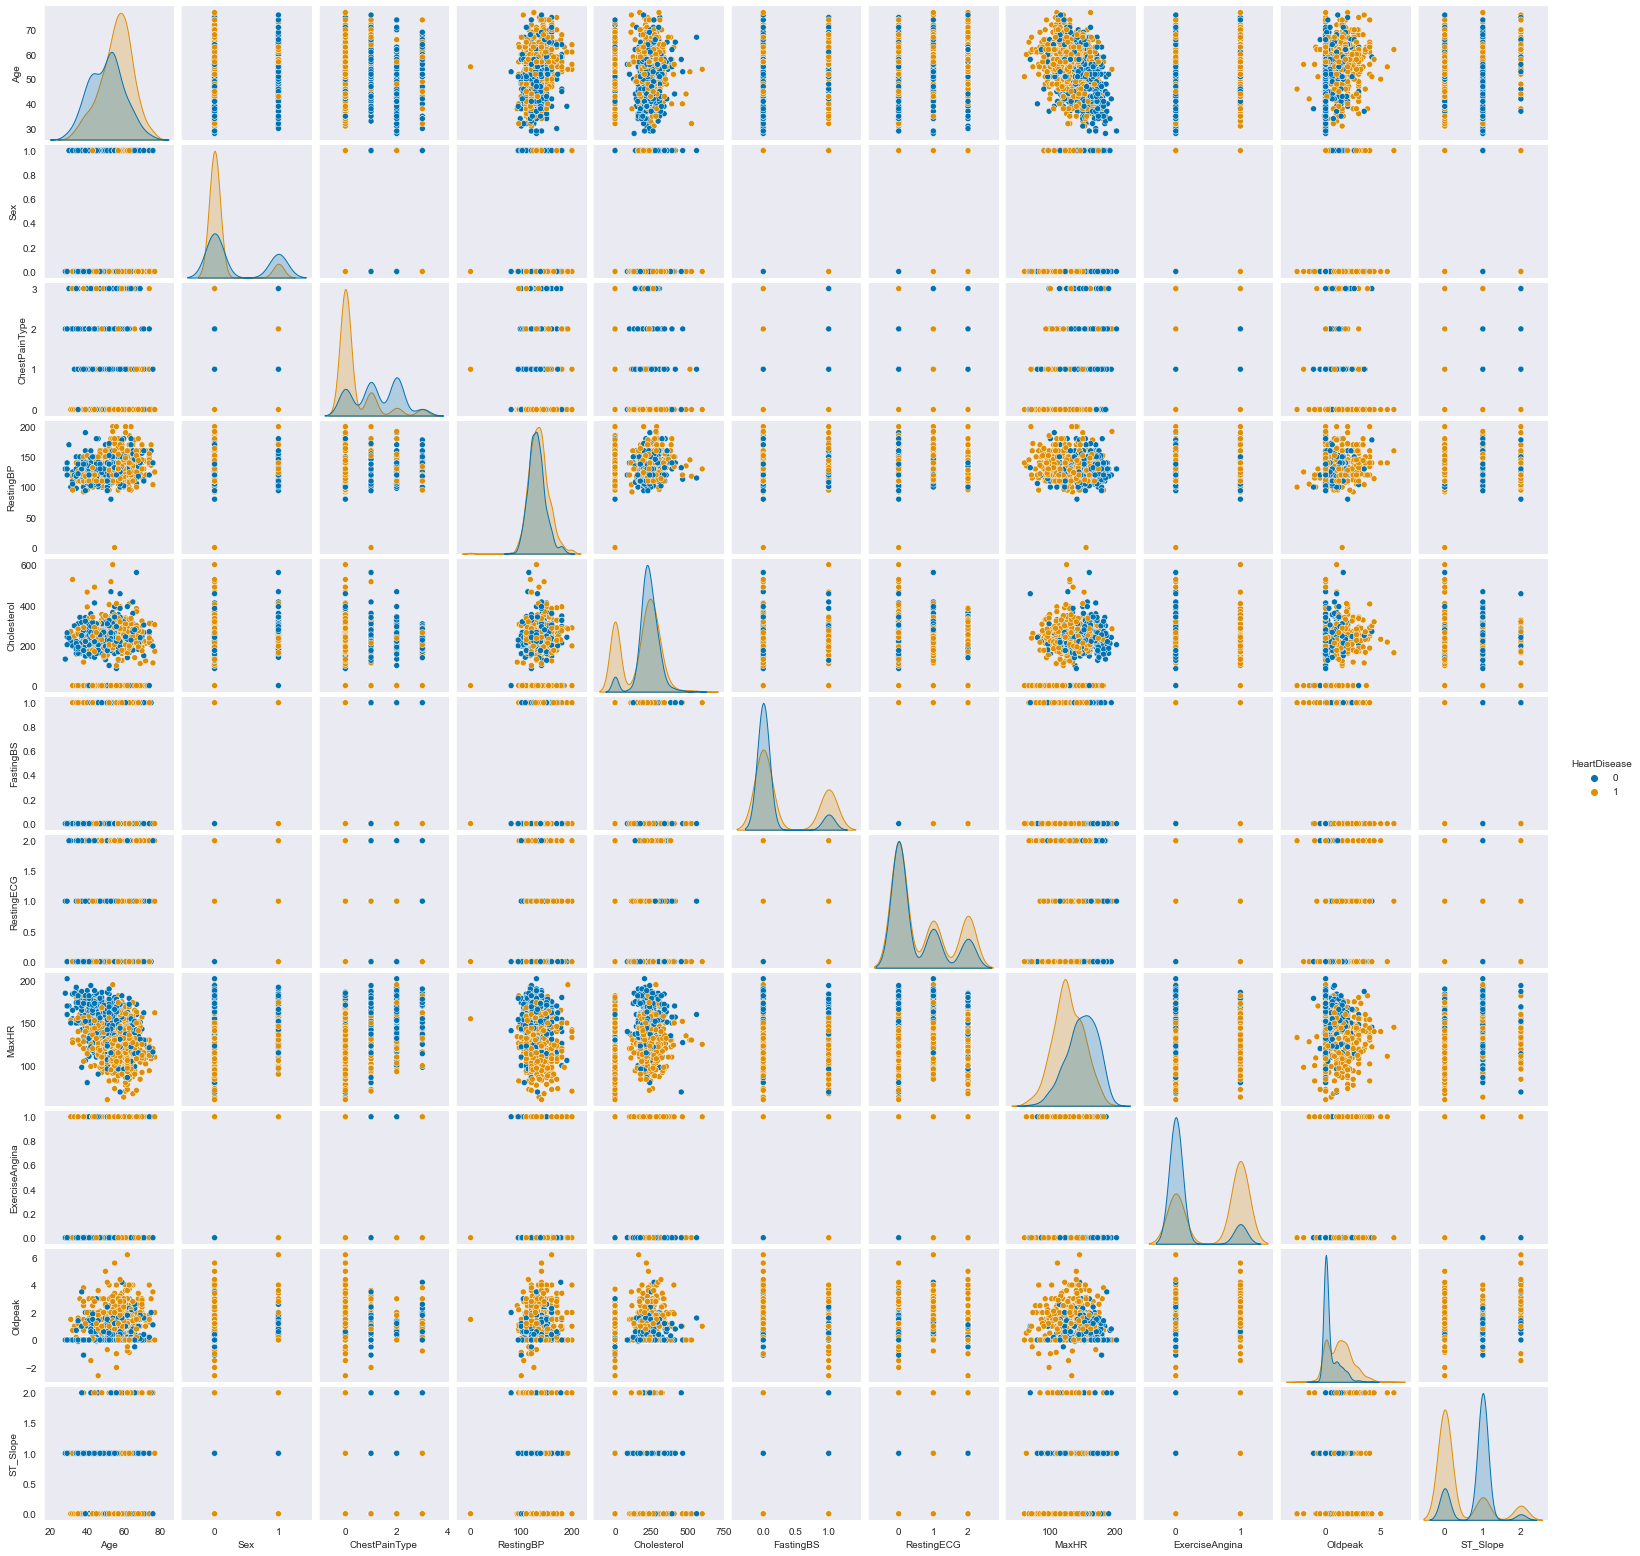

In [23]:
sns.pairplot(df, hue="HeartDisease", height = 2, palette = 'colorblind');

# Pair Plot
- After converting the feature of object type by integer we got a new pair plot.
- This pair plot consider all the attribute including the converted attributes.
- We can see the pair plot has changed compared to the previous one.
- But in the plot, we can see it is very tough to properly separate classs because they overlapped with each other.
- Although we can select Cholesterol-MaxHR or RestingBP-MaxHR or Oldpeak-MaxHR feature they will not be able to make accurate predictions.
- We will test our model with these features but before that, we will use other data analyses.

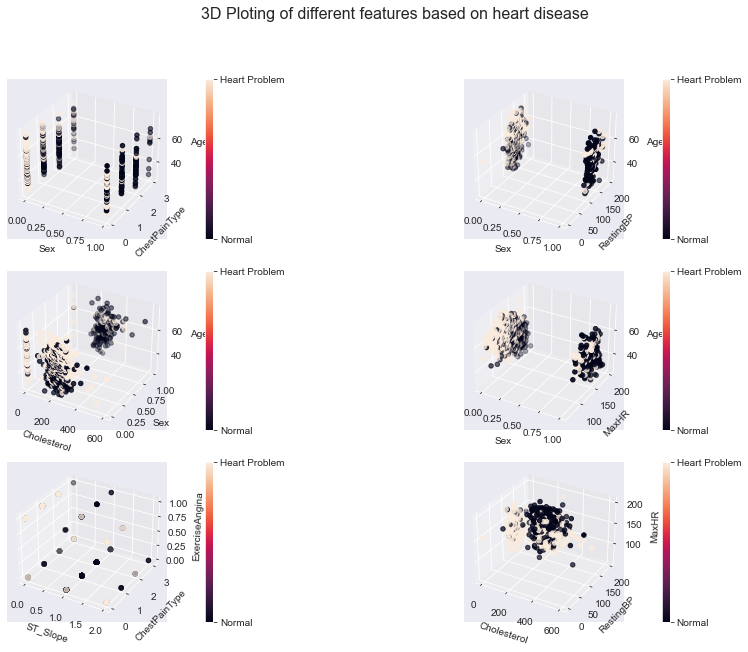

In [24]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('3D Ploting of different features based on heart disease', size=16, x=0.6)

ax = fig.add_subplot(3,2,1, projection='3d')
scat_plot = ax.scatter(xs = df['Sex'], ys = df['ChestPainType'], zs = df['Age'], c=df['HeartDisease'])
cb = plt.colorbar(scat_plot, pad=0.1)
#ax.set_title("Age-wise body weight-height distribution")
ax.set_xlabel("Sex")
ax.set_ylabel("ChestPainType")
ax.set_zlabel("Age")
cb.set_ticks([0,1]) 
cb.set_ticklabels(["Normal", "Heart Problem"])

ax = fig.add_subplot(3,2,2, projection='3d')
scat_plot = ax.scatter(xs = df['Sex'], ys = df['RestingBP'], zs = df['Age'], c=df['HeartDisease'])
cb = plt.colorbar(scat_plot, pad=0.1)
#ax.set_title("Age-wise body weight-height distribution")
ax.set_xlabel("Sex")
ax.set_ylabel("RestingBP")
ax.set_zlabel("Age")
cb.set_ticks([0,1]) 
cb.set_ticklabels(["Normal", "Heart Problem"])

ax = fig.add_subplot(3,2,3, projection='3d')
scat_plot = ax.scatter(xs = df['Cholesterol'], ys = df['Sex'], zs = df['Age'], c=df['HeartDisease'])
cb = plt.colorbar(scat_plot, pad=0.1)
#ax.set_title("Age-wise body weight-height distribution")
ax.set_xlabel("Cholesterol")
ax.set_ylabel("Sex")
ax.set_zlabel("Age")
cb.set_ticks([0,1]) 
cb.set_ticklabels(["Normal", "Heart Problem"])

ax = fig.add_subplot(3,2,4, projection='3d')
scat_plot = ax.scatter(xs = df['Sex'], ys = df['MaxHR'], zs = df['Age'], c=df['HeartDisease'])
cb = plt.colorbar(scat_plot, pad=0.1)
#ax.set_title("Age-wise body weight-height distribution")
ax.set_xlabel("Sex")
ax.set_ylabel("MaxHR")
ax.set_zlabel("Age")
cb.set_ticks([0,1]) 
cb.set_ticklabels(["Normal", "Heart Problem"])

ax = fig.add_subplot(3,2,5, projection='3d')
scat_plot = ax.scatter(xs = df['ST_Slope'], ys = df['ChestPainType'], zs = df['ExerciseAngina'], c=df['HeartDisease'])
cb = plt.colorbar(scat_plot, pad=0.1)
#ax.set_title("Age-wise body weight-height distribution")
ax.set_xlabel("ST_Slope")
ax.set_ylabel("ChestPainType")
ax.set_zlabel("ExerciseAngina")
cb.set_ticks([0,1]) 
cb.set_ticklabels(["Normal", "Heart Problem"])

ax = fig.add_subplot(3,2,6, projection='3d')
scat_plot = ax.scatter(xs = df['Cholesterol'], ys = df['RestingBP'], zs = df['MaxHR'], c=df['HeartDisease'])
cb = plt.colorbar(scat_plot, pad=0.1)
#ax.set_title("Age-wise body weight-height distribution")
ax.set_xlabel("Cholesterol")
ax.set_ylabel("RestingBP")
ax.set_zlabel("MaxHR")
cb.set_ticks([0,1]) 
cb.set_ticklabels(["Normal", "Heart Problem"])
plt.show()



# 3D Plot
- Till now we have used correlation matrix, parallel coordinates, and pair plots but we were not able to classify them properly.
- So far, these plotting techniques used two features for classification and did not classify properly.
- This 3D plot take three feature and classify them based on heart disease.
- This technique will help us to select the best feature for our model than the correlation matrix and pair plot.
- In the second figure, we can see heart disease classification is done by age, sex, RestingBP which is more appropriate than a pair plot.
- In the fourth figure, we can see heart disease classification is done by age, sex, MaxHR which is more appropriate than the pair plot and correlation matrix.

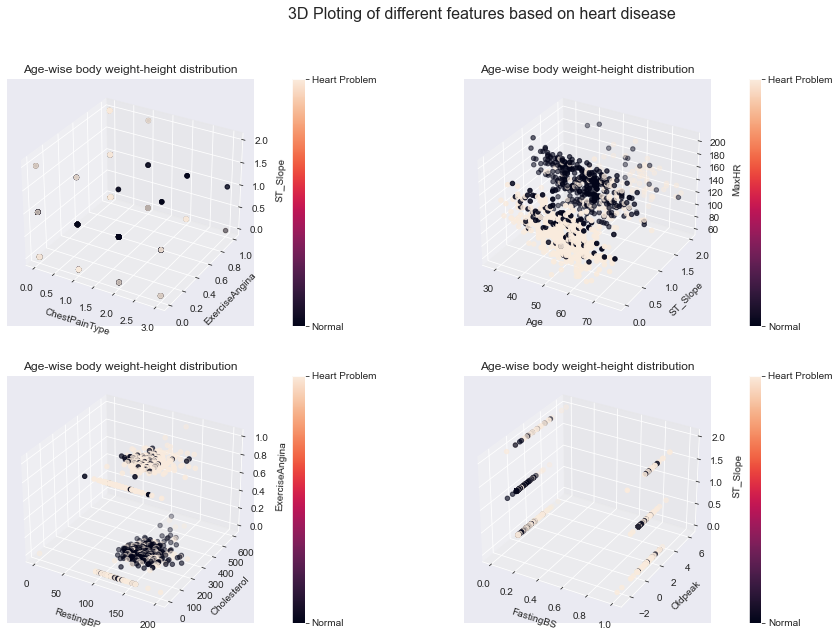

In [25]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('3D Ploting of different features based on heart disease', size=16, x=0.6)
ax = fig.add_subplot(2,2,1, projection='3d')
scat_plot = ax.scatter(xs = df['ChestPainType'], ys = df['ExerciseAngina'], zs = df['ST_Slope'], c=df['HeartDisease'])
cb = plt.colorbar(scat_plot, pad=0.1)
ax.set_title("Age-wise body weight-height distribution")
ax.set_xlabel("ChestPainType")
ax.set_ylabel("ExerciseAngina")
ax.set_zlabel("ST_Slope")
cb.set_ticks([0,1]) 
cb.set_ticklabels(["Normal", "Heart Problem"])

ax = fig.add_subplot(2,2,2, projection='3d')
scat_plot = ax.scatter(xs = df['Age'], ys = df['ST_Slope'], zs = df['MaxHR'], c=df['HeartDisease'])
cb = plt.colorbar(scat_plot, pad=0.1)
ax.set_title("Age-wise body weight-height distribution")
ax.set_xlabel("Age")
ax.set_ylabel("ST_Slope")
ax.set_zlabel("MaxHR")
cb.set_ticks([0,1]) 
cb.set_ticklabels(["Normal", "Heart Problem"])


ax = fig.add_subplot(2,2,3, projection='3d')
scat_plot = ax.scatter(xs = df['RestingBP'], ys = df['Cholesterol'], zs = df['ExerciseAngina'], c=df['HeartDisease'])
cb = plt.colorbar(scat_plot, pad=0.1)
ax.set_title("Age-wise body weight-height distribution")
ax.set_xlabel("RestingBP")
ax.set_ylabel("Cholesterol")
ax.set_zlabel("ExerciseAngina")
cb.set_ticks([0,1]) 
cb.set_ticklabels(["Normal", "Heart Problem"])

ax = fig.add_subplot(2,2,4, projection='3d')
scat_plot = ax.scatter(xs = df['FastingBS'], ys = df['Oldpeak'], zs = df['ST_Slope'], c=df['HeartDisease'])
cb = plt.colorbar(scat_plot, pad=0.1)
ax.set_title("Age-wise body weight-height distribution")
ax.set_xlabel("FastingBS")
ax.set_ylabel("Oldpeak")
ax.set_zlabel("ST_Slope")
cb.set_ticks([0,1]) 
cb.set_ticklabels(["Normal", "Heart Problem"])

# 3D Plot
- Till now we have used correlation matrix, parallel coordinates, and pair plots but we were not able to classify them properly.
- So far, these ploting techniques used two features for classification and did not classify properly.
- This 3D plot take three feature and classify them based on heart disease.
- This technique will help us to select the best feature for our model than the correlation matrix and pair plot.
- For our model selected features are FastingBS, Oldpeak, ST_Slope.

# Model development
 - Supervised Machine Learning
 - SVM, DT, LR, NB, KNN

In [26]:
X=df[['FastingBS','Oldpeak','ST_Slope']]
X

,FastingBS,Oldpeak,ST_Slope
0,0,0.0,1
1,0,1.0,0
2,0,0.0,1
3,0,1.5,0
4,0,0.0,1
...,...,...,...
913,0,1.2,0
914,1,3.4,0
915,0,1.2,0
916,0,0.0,0


<h3> Feature Matrix </h3>

- Our model will be supervised machine learning as the data used in this model are labeled.
- Here we have selected the feature that will be used to train our machine learning model of heart disease prediction.
- We can select all the attributes as feature except the target variable but this can make our model overfitting and this need more computational power.
- We selected these features based on the exploratory data analysis.

In [27]:
y = df['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

<h3>Target Vector</h3>

- Here our target variable is HeartDisease
- It is a classification problem because the heart disease attribute has only two discrete values (0, 1)
- '0' means the patient is normal and '1' means the patient has heart disease
- Based on the feature matrix model will decide what will be the output

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (642, 3)
X_test shape:  (276, 3)
y_train shape:  (642,)
y_test shape:  (276,)


<h3> Data Split</h3>

- For ml model data is used in two basic steps:
      1. Training
      2. Testing

- So we need to split our dataset into two portions- one for training another for testing
- We will use 70% of our data to train our model and 30% of data to test our model that's why we defined test_size = 0.3
- We defined random states so that every time we execute our code the result would be the same.
- Both feature matrix and target vector were divided into two portions (training and testing).
- Then we show the shape of the training and testing data and we can see the shape of these matrices is not the same as the shape of the dataset.


In [29]:
# 1.SVM
# importing the necessary package to use the classification algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))


----------------------------------
The accuracy of the SVM is: 0.8333
----------------------------------


# Support Vector Machine (SVM) Algorithm
- We use the scikit-learn library to develop SVM algorithm
- Metrics module is used to check the accuracy of the model
- We created SVM model simply by svm.SVC()
- Then trained this model by calling the fit() method and training feature and target data was passed as parameter
- Then test our model by calling predict() method and as a parameter testing feature data was passed.
- Then accuracy_score() method is used to calculate the correctness of the predicted value.
- We got 83% accuracy.

In [30]:
# 2.DT
# importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.8007
---------------------------------


# Decision Tree (DT) Algorithm
- We use scikit-learn library to develop DT algorithm
- The Metrics module is used to check the accuracy of the model
- We created DT model simply by DecisionTreeClassifier() and to obtain a deterministic behavior during fitting as a parameter we set the random_state value 4
- Then trained this model by calling the fit() method and training feature and target data was passed as parameter
- Then test our model by calling predict() method and as a paremeter testing feature data was passed.
- Then accuracy_score() method is used to calculate the correctness of the predicted value.
- We got 80% accuracy.

In [31]:
# 3.KNN
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.8188
----------------------------------


C:\Users\Arafat\.virtualenvs\virproject-iHCyxM5t\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# K nearest neighbours (KNN) Algorithm
- We use the scikit-learn library to develop KNN algorithm
- The Metrics module is used to check the accuracy of the model
- We created KNN model simply by KNeighborsClassifier() and as a parameter n_neighbors value (Number of neighbors to use) 3 passed.
- Then trained this model by calling the fit() method and training feature and target data was passed as parameter
- Then test our model by calling predict() method and as a parameter testing feature data was passed.
- Then accuracy_score() method is used to calculate the correctness of the predicted value.
- We got 81% accuracy.

In [32]:
# 4. LR
# importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.7826
---------------------------------


# Logistic Regression (LR) Algorithm
- We use the scikit-learn library to develop LR algorithm.
- The Metrics module is used to check the accuracy of the model
- We created LR model simply by LogisticRegression().
- Then trained this model by calling the fit() method and training feature and target data was passed as parameter
- Then test our model by calling predict() method and as a parameter testing feature data was passed.
- Then accuracy_score() method is used to calculate the correctness of the predicted value.
- We got 80% accuracy.

In [33]:
# 5. NB
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.721
---------------------------------


# Gaussian Naive Bayes (NB) Algorithm
- We use the scikit-learn library to develop NB algorithm.
- The metrics module is used to check the accuracy of the model
- We created NB model simply by GaussianNB().
- Then trained this model by calling the fit() method and training feature and target data was passed as parameter
- Then test our model by calling predict() method and as a parameter testing feature data was passed.
- Then accuracy_score() method is used to calculate the correctness of the predicted value.

In [34]:
model_name=[]
result=[]
for i in score:
    model_name.append(i[0])
    result.append(i[1])


model_result = pd.DataFrame({'model_name': model_name,
 'result': result})
model_result

,model_name,result
0,SVM,0.8333
1,LR,0.7826
2,KNN,0.8188
3,DT,0.8007
4,NB,0.7210


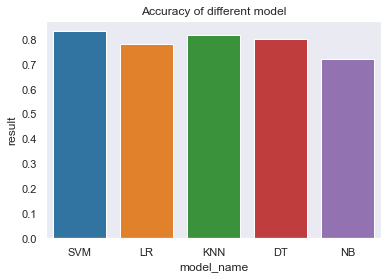

In [35]:
sns.set_context("notebook")
bar_plot = sns.barplot(x='model_name', y='result', data=model_result)
bar_plot.set_title("Accuracy of different model");

# Comparison of results
- We can see from our selected features different models produce different accuracy.
- Sometimes by changing value of random_state parameter the accuracy of the model can be increace 0.01% or more.
- SVM has the highest accuracy 83%
- Naive Bayes has the lowest accuracy 72%


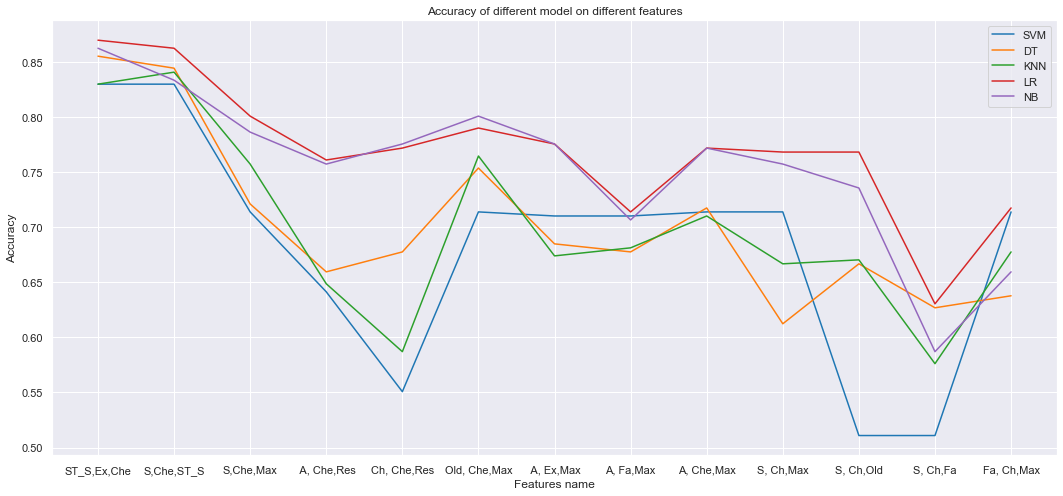

In [41]:
df2=pd.read_csv("Accuracy.csv")
sns.set_style("darkgrid")
plt.figure(figsize=(18,8))
plt.title("Accuracy of different model on different features")
sns.lineplot(data=df2, x="Features name", y="SVM", label='SVM')
sns.lineplot(data=df2, x="Features name", y="DT", label='DT')
sns.lineplot(data=df2, x="Features name", y="KNN", label='KNN')
sns.lineplot(data=df2, x="Features name", y="LR", label='LR')
sns.lineplot(data=df2, x="Features name", y="NB", label='NB')
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.show()

# Comparison of models
- We can see the line plot of different models' accuracy on a different features.
- Here we have used the short names of the features due to put the labels accurately on the graph.
- We can see for some features (ST_Slope,ExerciseAngina,ChestPainType) Logistic Regression has the highest accuracy on the  other hand for some features (Oldpeak,ChestPainType,MaxHR) Naive Bayes has the highest accuracy.
- For some features, all the model's accuracy is close.
- Naive bayes has the lowest accuracy 72%

# Conclusion
- We have successfully finished our project on heart disease prediction from data collection to model building.
- We have done data cleaning, and exploratory data analysis to select the best feature for the model, model building, comparison of different models' accuracy, and for different features how the models perform
- Models' performance depends on the features.
- Models' performance can be increased by changing some parameters like random states or by using a large dataset.
- In this project, SVM did not perform well. We can use kernel tricks.
- For the highest accuracy we can use CNN model.